# Data Preprocessing

In [ ]:
import pandas as pd

IBM_data = pd.read_csv('IBM_data.csv')
IBM_data.rename(columns={IBM_data.columns[0]: 'date'}, inplace=True)

IBM_data.head()

,date,close,treasury_yield,^SP500-45,interest_rate
0,1999-11-01,96.75,5.16,605.730713,5.38
1,1999-11-02,94.81,5.14,605.990723,5.18
2,1999-11-03,94.37,5.12,615.300232,5.21
3,1999-11-04,91.56,5.10,621.889954,5.27
4,1999-11-05,90.25,5.14,629.349609,5.14


In [ ]:
IBM_data['date'] = pd.to_datetime(IBM_data['date'], errors='coerce')
IBM_data.set_index('date', inplace=True)

In [ ]:
# check num
nan_summary = IBM_data.isna().sum()
data_description = IBM_data.describe(include='all')
nan_summary, data_description

(close             2841
 treasury_yield    2608
 ^SP500-45         2846
 interest_rate        0
 dtype: int64,
               close treasury_yield    ^SP500-45  interest_rate
 count   6291.000000           6524  6286.000000    9132.000000
 unique          NaN            620          NaN            NaN
 top             NaN              .          NaN            NaN
 freq            NaN            269          NaN            NaN
 mean     131.843785            NaN   969.293597       1.925161
 std       36.459989            NaN   953.435191       2.030344
 min       55.070000            NaN   172.880005       0.040000
 25%      101.675000            NaN   346.052505       0.140000
 50%      129.000000            NaN   510.345001       1.170000
 75%      156.315000            NaN  1204.584961       3.502500
 max      235.260000            NaN  4616.319824       7.030000)

In [ ]:
IBM_data['treasury_yield'] = IBM_data['treasury_yield'].replace('.', pd.NA)
IBM_data['treasury_yield'] = pd.to_numeric(IBM_data['treasury_yield'], errors='coerce')
IBM_data['^SP500-45'] = pd.to_numeric(IBM_data['^SP500-45'], errors='coerce')

IBM_data['close'] = IBM_data['close'].interpolate(method='linear')
IBM_data['treasury_yield'] = IBM_data['treasury_yield'].interpolate(method='linear')
IBM_data['^SP500-45'] = IBM_data['^SP500-45'].interpolate(method='linear')
IBM_data['interest_rate'] = IBM_data['interest_rate'].interpolate(method='linear')

IBM_data.isna().sum()

,0
close,0
treasury_yield,0
^SP500-45,0
interest_rate,0


In [ ]:
IBM_data['close_rolling_mean_7'] = IBM_data['close'].rolling(window=7).mean()
IBM_data['close_rolling_std_7'] = IBM_data['close'].rolling(window=7).std()

In [ ]:
IBM_data['daily_return'] = IBM_data['close'].pct_change()

In [ ]:
IBM_data['interaction_rate_yield'] = IBM_data['interest_rate'] * IBM_data['treasury_yield']

In [ ]:
IBM_data.isna().sum()

,0
close,0
treasury_yield,0
^SP500-45,0
interest_rate,0
close_rolling_mean_7,6
close_rolling_std_7,6
daily_return,1
interaction_rate_yield,0


In [ ]:
# Interpolate rolling statistics
IBM_data['close_rolling_mean_7'] = IBM_data['close'].rolling(window=7, min_periods=1).mean()
IBM_data['close_rolling_std_7'] = IBM_data['close'].rolling(window=7, min_periods=1).std()
IBM_data['close_rolling_std_7'] = IBM_data['close_rolling_std_7'].interpolate(method='linear').ffill().bfill()

# Fill NaNs in daily return with the column mean
IBM_data['daily_return'] = IBM_data['daily_return'].fillna(IBM_data['daily_return'].mean())


In [ ]:
IBM_data.isna().sum()

,0
close,0
treasury_yield,0
^SP500-45,0
interest_rate,0
close_rolling_mean_7,0
close_rolling_std_7,0
daily_return,0
interaction_rate_yield,0


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"{name}: ADF Statistic = {result[0]}, p-value = {result[1]}")
    if result[1] <= 0.05:
        print("The series is stationary.\n")
    else:
        print("The series is NOT stationary.\n")

test_stationarity(IBM_data['close'], "close")
test_stationarity(IBM_data['treasury_yield'], "treasury_yield")
test_stationarity(IBM_data['^SP500-45'], "^SP500-45")
test_stationarity(IBM_data['interest_rate'], "interest_rate")
test_stationarity(IBM_data['interaction_rate_yield'], "interaction_rate_yield")
test_stationarity(IBM_data['close_rolling_mean_7'], "close_rolling_mean_7")
test_stationarity(IBM_data['close_rolling_std_7'], "close_rolling_std_7")
test_stationarity(IBM_data['daily_return'], "daily_return")


close: ADF Statistic = -1.8336659355160443, p-value = 0.36388017271990436
The series is NOT stationary.

treasury_yield: ADF Statistic = -1.3910169364177052, p-value = 0.5865750548007816
The series is NOT stationary.

^SP500-45: ADF Statistic = 4.091572536498566, p-value = 1.0
The series is NOT stationary.

interest_rate: ADF Statistic = -1.2813805813415204, p-value = 0.637647089891833
The series is NOT stationary.

interaction_rate_yield: ADF Statistic = -1.6522381136616835, p-value = 0.455873444901928
The series is NOT stationary.

close_rolling_mean_7: ADF Statistic = -1.355857731794949, p-value = 0.6032461487348952
The series is NOT stationary.

close_rolling_std_7: ADF Statistic = -8.909667031621282, p-value = 1.113123954529604e-14
The series is stationary.

daily_return: ADF Statistic = -17.99275975892787, p-value = 2.7508108988984208e-30
The series is stationary.



In [ ]:
IBM_data['close_diff'] = IBM_data['close'].diff()
IBM_data['treasury_yield_diff'] = IBM_data['treasury_yield'].diff()
IBM_data['SP500_45_diff'] = IBM_data['^SP500-45'].diff()
IBM_data['interest_rate_diff'] = IBM_data['interest_rate'].diff()
IBM_data['interaction_rate_yield_diff'] = IBM_data['interaction_rate_yield'].diff()
IBM_data['close_rolling_mean_7_diff'] = IBM_data['close_rolling_mean_7'].diff()

IBM_data = IBM_data.dropna()

# ARIMAX MODEL

In [ ]:
from sklearn.preprocessing import StandardScaler

target = IBM_data['close']
train_size = int(len(IBM_data) * 0.7)

# Calculate EMAs for the training set
train_ema_7 = target.iloc[:train_size].ewm(span=7, adjust=False).mean()
train_ema_30 = target.iloc[:train_size].ewm(span=30, adjust=False).mean()

# Initialize test EMAs using the last EMA value from the training set to prevent data leakage
test_ema_7 = target.iloc[train_size:].copy()
test_ema_7.iloc[0] = train_ema_7.iloc[-1]
test_ema_7 = test_ema_7.ewm(span=7, adjust=False).mean()

test_ema_30 = target.iloc[train_size:].copy()
test_ema_30.iloc[0] = train_ema_30.iloc[-1]
test_ema_30 = test_ema_30.ewm(span=30, adjust=False).mean()

IBM_data['EMA_7'] = pd.concat([train_ema_7, test_ema_7])
IBM_data['EMA_30'] = pd.concat([train_ema_30, test_ema_30])

exog_features = IBM_data[['treasury_yield_diff', 'SP500_45_diff',
                          'interest_rate_diff', 'interaction_rate_yield_diff',
                          'close_rolling_mean_7_diff', 'close_rolling_std_7',
                          'daily_return', 'EMA_7', 'EMA_30']].dropna()


# Train, test split
train_endog = target.iloc[:train_size]
train_exog = exog_features.iloc[:train_size]
test_endog = target.iloc[train_size:]
test_exog = exog_features.iloc[train_size:]

scaler = StandardScaler()
scaler.fit(train_exog)

train_exog_scaled = pd.DataFrame(scaler.transform(train_exog), columns=train_exog.columns)
test_exog_scaled = pd.DataFrame(scaler.transform(test_exog), columns=test_exog.columns)

print(len(train_endog), len(train_exog), len(test_endog), len(test_exog))

6391 6391 2740 2740


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pandas as pd

# RFE function
def perform_rfe(train_exog, target, n_features):
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n_features)
    rfe.fit(train_exog, target)

    feature_ranking = pd.Series(rfe.ranking_, index=train_exog.columns)
    selected_features = feature_ranking[feature_ranking == 1].index.tolist()

    print("Selected Features:", selected_features)
    return selected_features

# Select top 5 features
n_features_to_select = 5
selected_features = perform_rfe(train_exog, train_endog, n_features_to_select)

# Filter train_exog and test_exog with selected features
# train_exog_selected = train_exog[selected_features]
# test_exog_selected = test_exog[selected_features]

train_exog_selected = train_exog
test_exog_selected = test_exog


Selected Features: ['treasury_yield_diff', 'interest_rate_diff', 'close_rolling_mean_7_diff', 'daily_return', 'EMA_7']


In [ ]:
from pmdarima import auto_arima

# Use auto_arima to find the best parameters
auto_model = auto_arima(train_endog,
                        exogenous=train_exog_selected,
                        start_p=1, start_q=1,
                        max_p=5, max_q=5,
                        seasonal=True,
                        d=None,
                        D=None,
                        trace=True,
                        error_action='ignore',selection
                        suppress_warnings=True,
                        stepwise=False)

print("Best model order:", auto_model.order)
print("Best seasonal order:", auto_model.seasonal_order)


 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=23254.934, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=23249.054, Time=1.65 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=23247.540, Time=2.17 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=23249.449, Time=6.22 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=23248.406, Time=4.20 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=23249.939, Time=5.66 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=23248.705, Time=2.00 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=23249.132, Time=9.19 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=23249.506, Time=11.52 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=23251.540, Time=5.08 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=23249.366, Time=14.91 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=23247.792, Time=1.85 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=23249.673, Time=5.13 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=23245.368, Time=13.12 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=23245.410, Time=1

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Use the best parameters from auto_arima
model_arimax = SARIMAX(train_endog, exog=train_exog_selected,
                       order=auto_model.order,
                       seasonal_order=(0, 0, 0, 0),
                       enforce_stationarity=True,
                       enforce_invertibility=True)

# Fit the model
model_fit_arimax = model_arimax.fit(disp=False)
print(model_fit_arimax.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 6391
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4892.247
Date:                Mon, 16 Dec 2024   AIC                           9812.493
Time:                        23:53:33   BIC                           9907.168
Sample:                    11-02-1999   HQIC                          9845.267
                         - 05-01-2017                                         
Covariance Type:                  opg                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
treasury_yield_diff            -0.0180      0.124     -0.145      0.885      -0.261       0.225
SP500_45_diff                  -0.0018      0.000     -3.920      0.000      -0.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Get predictions for the training set
train_predictions = model_fit_arimax.fittedvalues

# Forecast for the test set
forecast_arimax = model_fit_arimax.get_forecast(steps=len(test_endog), exog=test_exog_selected)
test_predictions = forecast_arimax.predicted_mean

# Calculate RMSE for training and test data
train_rmse = np.sqrt(mean_squared_error(train_endog, train_predictions))
print(f"Training RMSE: {train_rmse}")
test_rmse = np.sqrt(mean_squared_error(test_endog, test_predictions))
print(f"Test RMSE: {test_rmse}")

# Calculate training residuals for ANN model
residuals = train_endog - train_predictions

Training RMSE: 0.6795026146873908
Test RMSE: 16.569575848714265


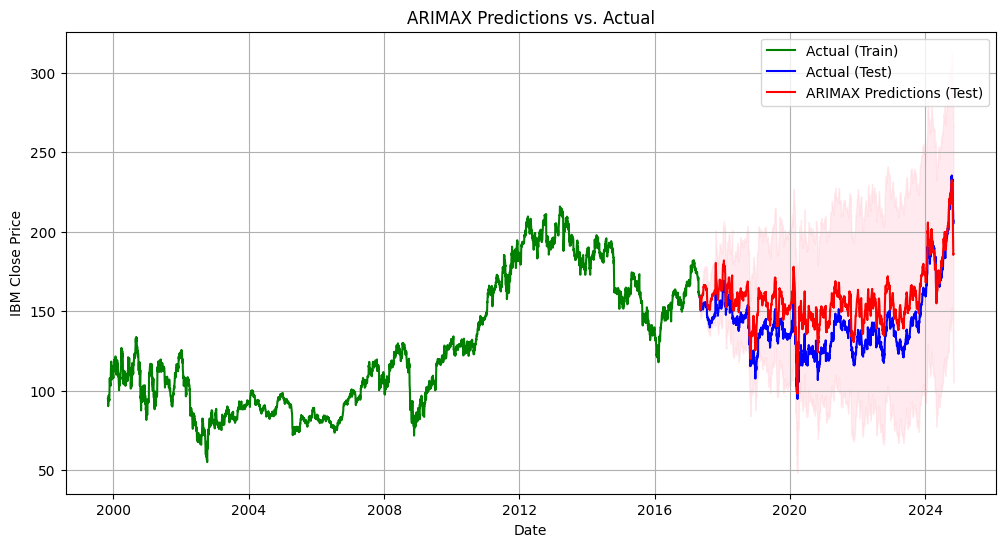

In [ ]:
# Confidence intervals for the test forecast
forecast_ci = forecast_arimax.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_endog.index, train_endog, label='Actual (Train)', color='green')
plt.plot(test_endog.index, test_endog, label='Actual (Test)', color='blue')
plt.plot(test_predictions.index, test_predictions, label='ARIMAX Predictions (Test)', color='red')
plt.fill_between(test_predictions.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMAX Predictions vs. Actual')
plt.xlabel('Date')
plt.ylabel('IBM Close Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    explained_var = explained_variance_score(y_true, y_pred)
    mpe = np.mean((y_true - y_pred) / y_true) * 100
    return mae, rmse, mape, explained_var, mpe

# Calculate metrics for ARIMAX
mae, rmse, mape, explained_var, mpe = calculate_metrics(test_endog, test_predictions)


# Display results
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}%")
print(f"Explained Variance: {explained_var:.3f}")
print(f"MPE: {mpe:.3f}%")

MAE: 15.363
RMSE: 16.570
MAPE: 11.321%
Explained Variance: 0.887
MPE: -11.153%


# ANN

In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


Hyperband hyperparameter tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from keras_tuner.tuners import Hyperband

scaler = StandardScaler()
train_exog_scaled = scaler.fit_transform(train_exog_selected)
test_exog_scaled = scaler.transform(test_exog_selected)
train_residuals = train_endog - train_predictions  # Residuals from ARIMAX

def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(train_exog_scaled.shape[1],)
    ))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(
        units=hp.Int('units_2', min_value=16, max_value=128, step=16),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])
        ),
        loss='mse',
        metrics=['mse']
    )
    return model

# Initialize the Hyperband tuner
tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='hyperband_tuning',
    project_name='arimax_ann_residuals'
)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

tuner.search(
    train_exog_scaled, train_residuals,
    validation_split=0.2,
    epochs=50,
    callbacks=[early_stopping],
    verbose=1
)

# Get the best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

Trial 90 Complete [00h 00m 20s]
val_loss: 0.07260801643133163

Best val_loss So Far: 0.0688665509223938
Total elapsed time: 00h 08m 01s
Best Hyperparameters: {'units_1': 224, 'dropout_1': 0.2, 'units_2': 48, 'dropout_2': 0.1, 'learning_rate': 0.001, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0048'}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Build ANN model based on best hyperpaprameter config
best_model = Sequential()

best_model.add(Dense(
    units=224,
    activation='relu',
    input_shape=(train_exog_scaled.shape[1],)
))
best_model.add(Dropout(rate=0.2))

best_model.add(Dense(
    units=48,
    activation='relu'
))
best_model.add(Dropout(rate=0.1))

best_model.add(Dense(1))

best_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # 学习率 0.001
    loss='mse',
    metrics=['mse']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the best model
history = best_model.fit(
    train_exog_scaled, train_residuals,
    validation_split=0.2,
    epochs=100,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3582 - mse: 0.3582 - val_loss: 0.1731 - val_mse: 0.1731
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3307 - mse: 0.3307 - val_loss: 0.1509 - val_mse: 0.1509
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3339 - mse: 0.3339 - val_loss: 0.1460 - val_mse: 0.1460
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5831 - mse: 0.5831 - val_loss: 0.1407 - val_mse: 0.1407
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4425 - mse: 0.4425 - val_loss: 0.1343 - val_mse: 0.1343
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2405 - mse: 0.2405 - val_loss: 0.1343 - val_mse: 0.1343
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3162 - mse: 0.3162 - val_loss: 0.1345 - val_mse: 0.1345
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2180 - mse: 0.2180 - val_loss: 0.1311 - val_mse: 0.1311
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

In [ ]:
# Predict residuals for the test set
test_residuals_pred = best_model.predict(test_exog_scaled).flatten()

# Combine ARIMAX predictions and ANN residuals
final_predictions = test_predictions + test_residuals_pred

# Calculate metrics for Hyperbrid Model
mae, rmse, mape, explained_var, mpe = calculate_metrics(test_endog, final_predictions)

# Display results
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"MAPE: {mape:.3f}%")
print(f"Explained Variance: {explained_var:.3f}")
print(f"MPE: {mpe:.3f}%")

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MAE: 15.348
RMSE: 16.541
MAPE: 11.314%
Explained Variance: 0.889
MPE: -11.150%


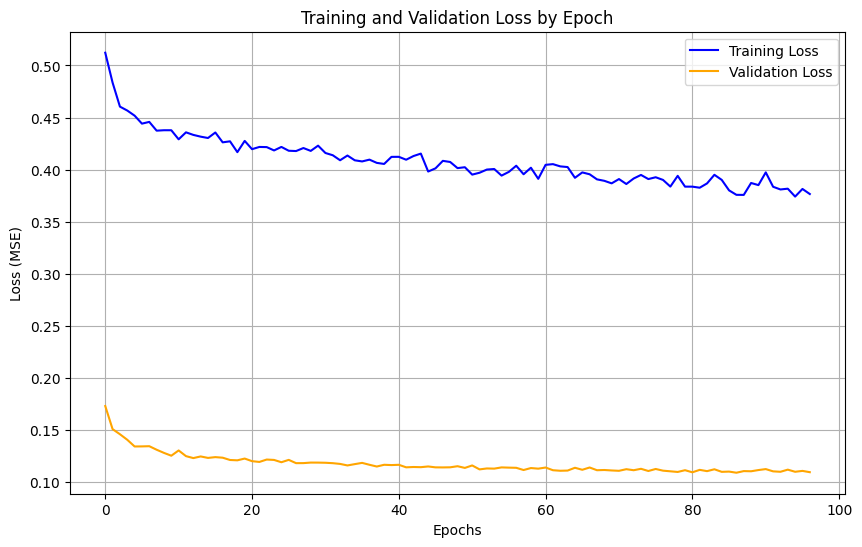

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss by Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

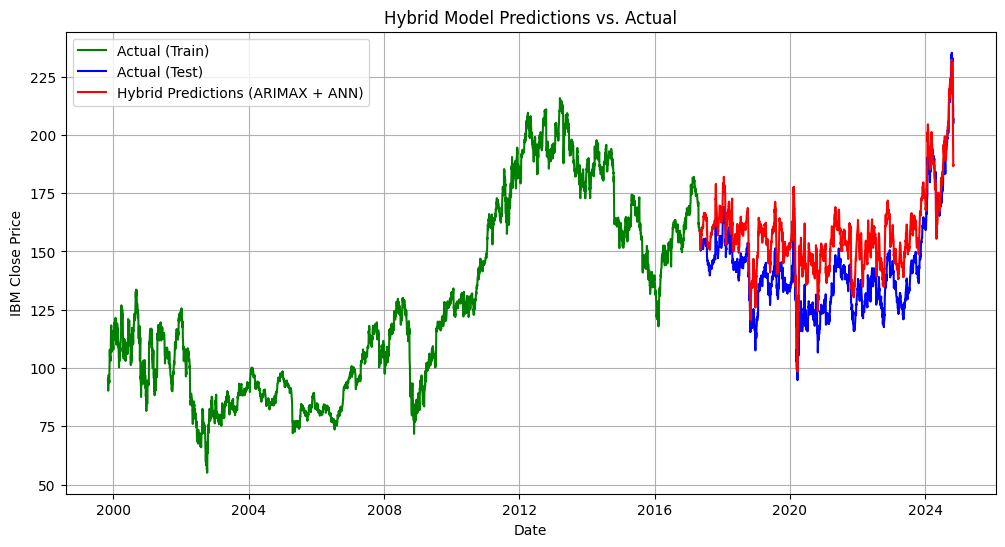

In [ ]:
# Plot Hybrid Model
plt.figure(figsize=(12, 6))
plt.plot(train_endog.index, train_endog, label='Actual (Train)', color='green')
plt.plot(test_endog.index, test_endog, label='Actual (Test)', color='blue')
plt.plot(test_predictions.index, final_predictions, label='Hybrid Predictions (ARIMAX + ANN)', color='red')
plt.title('Hybrid Model Predictions vs. Actual')
plt.xlabel('Date')
plt.ylabel('IBM Close Price')
plt.legend()
plt.grid()
plt.show()

# LSTM (The unfinished attempt of future work)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

scaler = StandardScaler()
train_exog_scaled = scaler.fit_transform(train_exog_selected)
test_exog_scaled = scaler.transform(test_exog_selected)
train_residuals = train_endog - train_predictions

# Sliding window
look_back = 30
X_train = []
y_train = []

In [ ]:
# Sliding window for test set
X_test = []
for i in range(look_back, len(test_exog_scaled)):
    X_test.append(test_exog_scaled[i - look_back:i])

X_test = np.array(X_test)

In [ ]:
for i in range(look_back, len(train_exog_scaled)):
    X_train.append(train_exog_scaled[i-look_back:i])
    y_train.append(train_residuals[i])

X_train, y_train = np.array(X_train), np.array(y_train)

train_size = int(len(X_train) * 0.8)
X_val, y_val = X_train[train_size:], y_train[train_size:]
X_train, y_train = X_train[:train_size], y_train[:train_size]

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Simple LSTM model
model = Sequential()
model.add(LSTM(units=384, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.2851 - val_loss: 0.2715
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.2455 - val_loss: 0.0879
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1467 - val_loss: 0.0456
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1057 - val_loss: 0.0396
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0745 - val_loss: 0.0273
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0663 - val_loss: 0.0297
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0563 - val_loss: 0.0193
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0508 - val_loss: 0.0173
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0509 - val_loss: 0.0288
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0518 - val_loss: 0.0179
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0486 - val_loss: 0.0150
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 

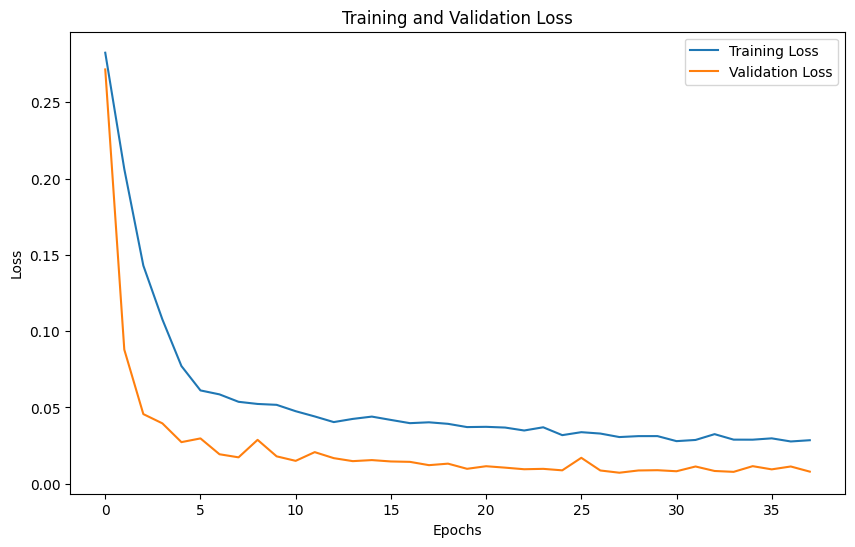

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_predictions

,predicted_mean
2017-05-02,159.502805
2017-05-03,158.790450
2017-05-04,158.862203
2017-05-05,154.799260
2017-05-06,152.919217
...,...
2024-10-27,325.218032
2024-10-28,320.140708
2024-10-29,314.134708
2024-10-30,305.294394


In [ ]:
n = 0
for i in range(len(train_residuals)):
  n+=1
print(n)

6391


In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_val)

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [ ]:
test_pred

array([[ 0.41264516],
       [-0.14152293],
       [-0.52665776],
       ...,
       [ 0.05509545],
       [ 0.18384415],
       [ 0.21365945]], dtype=float32)

In [ ]:
test_residuals_pred = model.predict(X_test).flatten()

print(f"Predicted Residuals Shape: {test_residuals_pred.shape}")


# ARIMAX+LSTM Hyperbid model results
final_predictions = test_predictions[look_back:] + test_residuals_pred

print("Final Predictions (Hybrid Model):")
print(final_predictions)


85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Predicted Residuals Shape: (2710,)
Final Predictions (Hybrid Model):
2017-06-01    140.214308
2017-06-02    139.869199
2017-06-03    139.987405
2017-06-04    140.037970
2017-06-05    140.162853
                 ...    
2024-10-27    325.292206
2024-10-28    320.205321
2024-10-29    314.190012
2024-10-30    305.340584
2024-10-31    303.013065
Freq: D, Name: predicted_mean, Length: 2710, dtype: float64


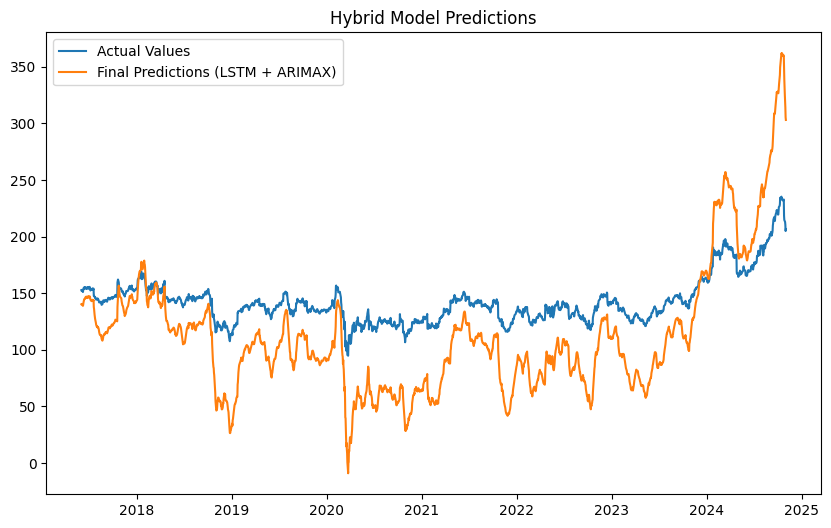

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_endog[look_back:], label='Actual Values')
plt.plot(final_predictions, label='Final Predictions (LSTM + ARIMAX)')
plt.legend()
plt.title('Hybrid Model Predictions')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

actual = test_endog[look_back:]
predicted = final_predictions

mse = mean_squared_error(actual, predicted)

mae = mean_absolute_error(actual, predicted)

rmse = np.sqrt(mse)

mape = np.mean(np.abs((actual - predicted) / actual)) * 100

explained_var = explained_variance_score(actual, predicted)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")
print(f"Explained Variance: {explained_var:.4f}")


Mean Squared Error (MSE): 2157.888
Mean Absolute Error (MAE): 41.015
Root Mean Squared Error (RMSE): 46.453
Mean Absolute Percentage Error (MAPE): 30.088%
Explained Variance: -1.9546


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.5 MB/s eta 0:00:00


Hyperband for LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import Hyperband

def build_model(hp):
    model = Sequential()

    model.add(LSTM(
        units=hp.Int('units_1', min_value=64, max_value=256, step=64),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32),
        return_sequences=True
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(LSTM(
        units=hp.Int('units_3', min_value=32, max_value=128, step=32),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='mean_squared_error'
    )

    return model

tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='hyperband_lstm',
    project_name='lstm_tuning'
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 90 Complete [00h 01m 29s]
val_loss: 0.013424036093056202

Best val_loss So Far: 0.00904084462672472
Total elapsed time: 00h 31m 12s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal hyperparameters:
- First LSTM units: {best_hps.get('units_1')}
- Second LSTM units: {best_hps.get('units_2')}
- Third LSTM units: {best_hps.get('units_3')}
- Dropout rates: {best_hps.get('dropout_1')}, {best_hps.get('dropout_2')}, {best_hps.get('dropout_3')}
- Learning rate: {best_hps.get('learning_rate')}
""")



The optimal hyperparameters:
- First LSTM units: 256
- Second LSTM units: 128
- Third LSTM units: 32
- Dropout rates: 0.1, 0.5, 0.5
- Learning rate: 0.001



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(units=128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3152 - val_loss: 0.2782
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.2678 - val_loss: 0.2094
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1966 - val_loss: 0.0512
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1452 - val_loss: 0.0388
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1468 - val_loss: 0.0335
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1115 - val_loss: 0.0336
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0860 - val_loss: 0.0414
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0764 - val_loss: 0.0275
Epoch 9/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0696 - val_loss: 0.0238
Epoch 10/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0643 - val_loss: 0.0184
Epoch 11/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0583 - val_loss: 0.0249
Epoch 12/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/

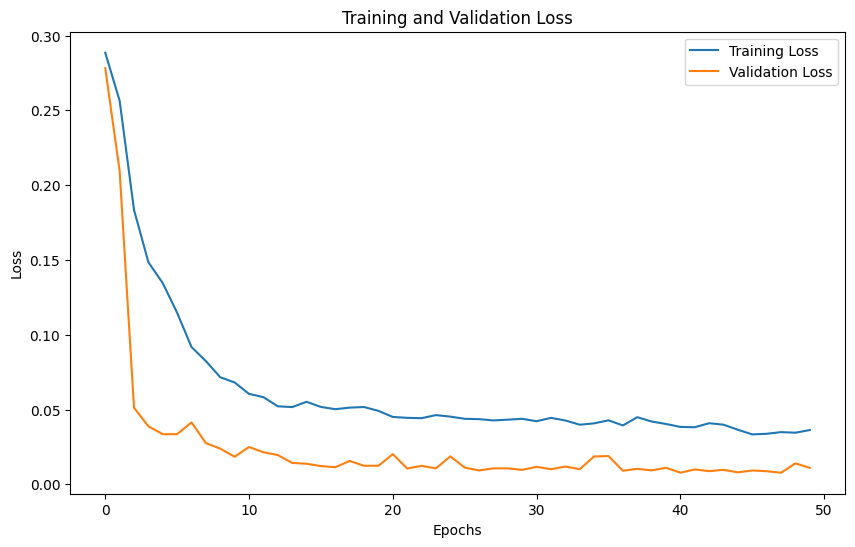

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_residuals_pred = model.predict(X_test).flatten()

print(f"Predicted Residuals Shape: {test_residuals_pred.shape}")


final_predictions = test_predictions[look_back:] + test_residuals_pred

print("Final Predictions (Hybrid Model):")
print(final_predictions)

85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Predicted Residuals Shape: (2710,)
Final Predictions (Hybrid Model):
2017-06-01    139.941111
2017-06-02    139.641913
2017-06-03    140.267433
2017-06-04    140.017788
2017-06-05    140.074240
                 ...    
2024-10-27    324.835180
2024-10-28    320.732790
2024-10-29    313.601732
2024-10-30    306.256740
2024-10-31    303.584039
Freq: D, Name: predicted_mean, Length: 2710, dtype: float64


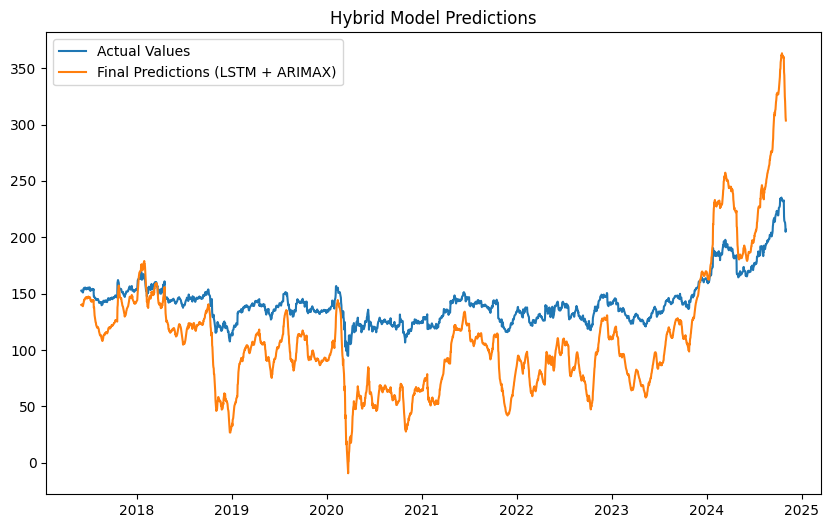

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test_endog[look_back:], label='Actual Values')
plt.plot(final_predictions, label='Final Predictions (LSTM + ARIMAX)')
plt.legend()
plt.title('Hybrid Model Predictions')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

actual = test_endog[look_back:]
predicted = final_predictions

mse = mean_squared_error(actual, predicted)

mae = mean_absolute_error(actual, predicted)

rmse = np.sqrt(mse)

mape = np.mean(np.abs((actual - predicted) / actual)) * 100

explained_var = explained_variance_score(actual, predicted)

print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.3f}%")
print(f"Explained Variance: {explained_var:.4f}")

Mean Squared Error (MSE): 2157.355
Mean Absolute Error (MAE): 41.002
Root Mean Squared Error (RMSE): 46.447
Mean Absolute Percentage Error (MAPE): 30.079%
Explained Variance: -1.9522
